<a href="https://colab.research.google.com/github/zainali60/Spark-Assignment-2/blob/main/K_Means_Clustering_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation: Task 2- Unsupervised Learning (K Means Clustering) - Iris Dataset**

K- Means Clustering Assignment - 2


Author : Zain Ali

Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

Importing the dataset

In [3]:
data  = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking Missing Values

In [4]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
x = data.drop(['Id', 'Species'], axis = 1) 

Output of Kmeans clustering with value 5

In [6]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 0 0 4 0 4 4 0 4 0 4 0 0 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 0 2 3 3 2 4 2 3 2 3
 3 3 0 3 3 3 2 2 0 3 0 2 0 3 2 0 0 3 2 2 2 3 0 0 2 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]


Print the centers of 5 clusters

In [7]:
kmeans5.cluster_centers_

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ]])

Printing the interia value

In [8]:
kmeans5.inertia_

46.53558205128205

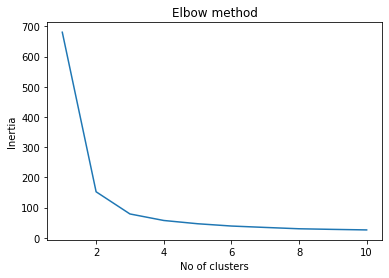

In [9]:
SSE =[]
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters = clusters).fit(x)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), SSE)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Printing the center points

In [12]:
kmeans3.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Let's see how many data points are in these 3 clusters.

In [13]:
frame = pd.DataFrame(x)
frame['cluster'] = y_kmeans3
frame['cluster'].value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

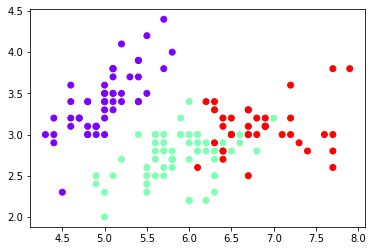

In [14]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y_kmeans3, cmap='rainbow')